# 앙상블(Ensemble)

머신러닝 앙상블이란 **여러개의 머신러닝 모델을 이용해 최적의 답을 찾아내는 기법**이다.

- 여러 모델을 이용하여 데이터를 학습하고, 모든 모델의 예측결과를 평균하여 예측

**앙상블 기법의 종류**
- 보팅 (Voting): 투표를 통해 결과 도출
- 배깅 (Bagging): 샘플 중복 생성을 통해 결과 도출
- 부스팅 (Boosting): 이전 오차를 보완하면서 가중치 부여
- 스태킹 (Stacking): 여러 모델을 기반으로 예측된 결과를 통해 meta 모델이 다시 한번 예측

**참고자료 (블로그)**

* [보팅(Voting)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-1)
* [배깅(Bagging)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2)
* [부스팅(Boosting)](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-3)

## 실습을 위한 데이터셋 로드

In [ ]:
# 튜토리얼 진행을 위한 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

np.set_printoptions(suppress=True, precision=3)

# SEED 설정
SEED = 30

In [ ]:
from sklearn.datasets import load_boston

`load_boston` 데이터셋 로드

In [ ]:
data = load_boston()

**컬럼 소개**

속성 수 : 13

* **CRIM**: 자치시 별 범죄율
* **ZN**: 25,000 평방 피트를 초과하는 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 토지 비율
* **CHAS**: 찰스 강과 인접한 경우에 대한 더비 변수 (1= 인접, 0= 인접하지 않음)
* **NOX**: 산화 질소 농도 (10ppm)
* **RM**:주택당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시별 학생-교사 비율
* **B**: 인구당 흑인의 비율. 1000(Bk - 0.63)^2, (Bk는 흑인의 비율을 뜻함)
* **LSTAT**: 하위 계층의 비율
* **target**: 자가 주택의 중앙값 (1,000 달러 단위)

In [ ]:
# 코드를 입력해 주세요
df = 

df.head()

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>CRIM</th>
      <th>ZN</th>
      <th>INDUS</th>
      <th>CHAS</th>
      <th>NOX</th>
      <th>RM</th>
      <th>AGE</th>
      <th>DIS</th>
      <th>RAD</th>
      <th>TAX</th>
      <th>PTRATIO</th>
      <th>B</th>
      <th>LSTAT</th>
      <th>target</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0.00632</td>
      <td>18.0</td>
      <td>2.31</td>
      <td>0.0</td>
      <td>0.538</td>
      <td>6.575</td>
      <td>65.2</td>
      <td>4.0900</td>
      <td>1.0</td>
      <td>296.0</td>
      <td>15.3</td>
      <td>396.90</td>
      <td>4.98</td>
      <td>24.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0.02731</td>
      <td>0.0</td>
      <td>7.07</td>
      <td>0.0</td>
      <td>0.469</td>
      <td>6.421</td>
      <td>78.9</td>
      <td>4.9671</td>
      <td>2.0</td>
      <td>242.0</td>
      <td>17.8</td>
      <td>396.90</td>
      <td>9.14</td>
      <td>21.6</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0.02729</td>
      <td>0.0</td>
      <td>7.07</td>
      <td>0.0</td>
      <td>0.469</td>
      <td>7.185</td>
      <td>61.1</td>
      <td>4.9671</td>
      <td>2.0</td>
      <td>242.0</td>
      <td>17.8</td>
      <td>392.83</td>
      <td>4.03</td>
      <td>34.7</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0.03237</td>
      <td>0.0</td>
      <td>2.18</td>
      <td>0.0</td>
      <td>0.458</td>
      <td>6.998</td>
      <td>45.8</td>
      <td>6.0622</td>
      <td>3.0</td>
      <td>222.0</td>
      <td>18.7</td>
      <td>394.63</td>
      <td>2.94</td>
      <td>33.4</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0.06905</td>
      <td>0.0</td>
      <td>2.18</td>
      <td>0.0</td>
      <td>0.458</td>
      <td>7.147</td>
      <td>54.2</td>
      <td>6.0622</td>
      <td>3.0</td>
      <td>222.0</td>
      <td>18.7</td>
      <td>396.90</td>
      <td>5.33</td>
      <td>36.2</td>
    </tr>
  </tbody>
</table>
</div>

**train / test 데이터를 분할** 합니다.

In [ ]:
from sklearn.model_selection import train_test_split

- random_state=SEED로 설정합니다.
- 나머지 설정은 default로 설정합니다.

In [ ]:
# 코드를 입력해 주세요
x_train, x_test, y_train, y_test = 

`x_train`, 과 `x_test`의 shape 확인

In [ ]:
# 코드를 입력해 주세요


<p><strong>[출력 결과]</strong></p><pre>((379, 13), (127, 13))</pre>

In [ ]:
# 코드검증
x_train.head()

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>CRIM</th>
      <th>ZN</th>
      <th>INDUS</th>
      <th>CHAS</th>
      <th>NOX</th>
      <th>RM</th>
      <th>AGE</th>
      <th>DIS</th>
      <th>RAD</th>
      <th>TAX</th>
      <th>PTRATIO</th>
      <th>B</th>
      <th>LSTAT</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>142</th>
      <td>3.32105</td>
      <td>0.0</td>
      <td>19.58</td>
      <td>1.0</td>
      <td>0.871</td>
      <td>5.403</td>
      <td>100.0</td>
      <td>1.3216</td>
      <td>5.0</td>
      <td>403.0</td>
      <td>14.7</td>
      <td>396.90</td>
      <td>26.82</td>
    </tr>
    <tr>
      <th>10</th>
      <td>0.22489</td>
      <td>12.5</td>
      <td>7.87</td>
      <td>0.0</td>
      <td>0.524</td>
      <td>6.377</td>
      <td>94.3</td>
      <td>6.3467</td>
      <td>5.0</td>
      <td>311.0</td>
      <td>15.2</td>
      <td>392.52</td>
      <td>20.45</td>
    </tr>
    <tr>
      <th>393</th>
      <td>8.64476</td>
      <td>0.0</td>
      <td>18.10</td>
      <td>0.0</td>
      <td>0.693</td>
      <td>6.193</td>
      <td>92.6</td>
      <td>1.7912</td>
      <td>24.0</td>
      <td>666.0</td>
      <td>20.2</td>
      <td>396.90</td>
      <td>15.17</td>
    </tr>
    <tr>
      <th>162</th>
      <td>1.83377</td>
      <td>0.0</td>
      <td>19.58</td>
      <td>1.0</td>
      <td>0.605</td>
      <td>7.802</td>
      <td>98.2</td>
      <td>2.0407</td>
      <td>5.0</td>
      <td>403.0</td>
      <td>14.7</td>
      <td>389.61</td>
      <td>1.92</td>
    </tr>
    <tr>
      <th>363</th>
      <td>4.22239</td>
      <td>0.0</td>
      <td>18.10</td>
      <td>1.0</td>
      <td>0.770</td>
      <td>5.803</td>
      <td>89.0</td>
      <td>1.9047</td>
      <td>24.0</td>
      <td>666.0</td>
      <td>20.2</td>
      <td>353.04</td>
      <td>14.64</td>
    </tr>
  </tbody>
</table>
</div>

In [ ]:
# 코드검증
y_train.head()

<p><strong>[출력 결과]</strong></p><pre>142    13.4
10     15.0
393    13.8
162    50.0
363    16.8
Name: target, dtype: float64</pre>

## 모델별 성능 확인을 위한 함수

In [ ]:
# 모듈 설치
!pip install teddynote -q

In [ ]:
from teddynote import utils

# 그래프 사이즈 설정
utils.set_plot_options(figsize=(12, 10))

# MSE 에러 설정
utils.set_plot_error('mse')

## 단일 회귀예측 모델

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

### LinearRegression

- 기본 옵션 값을 사용하여 학습합니다.

In [ ]:
# 코드를 입력해 주세요
linear_reg = 
linear_reg.
pred = 
utils.plot_error('LinearRegression', pred, y_test)

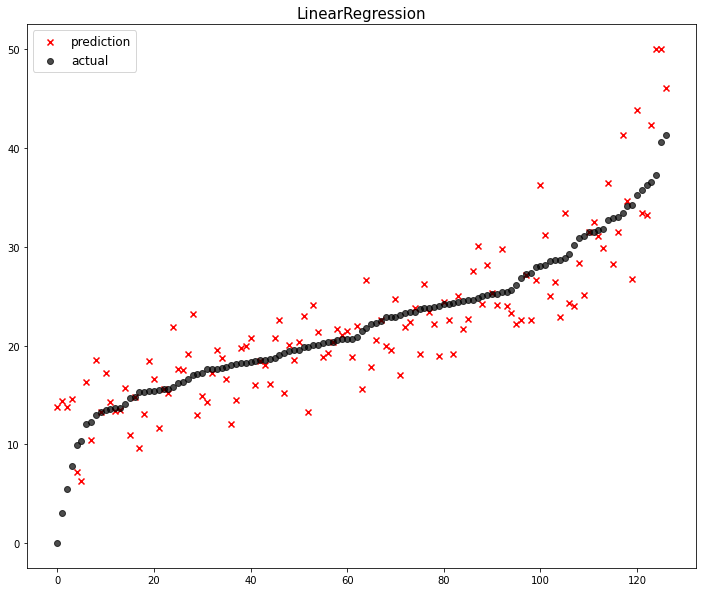

### Ridge

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>error</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>LinearRegression</td>
      <td>16.485165</td>
    </tr>
  </tbody>
</table>
</div>

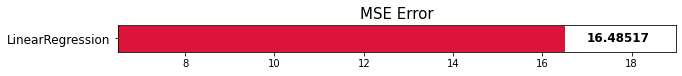

- 규제 계수인 `alpha=0.1`을 적용합니다.

In [ ]:
# 코드를 입력해 주세요
ridge = 
ridge.
pred = 
utils.plot_error('Ridge(alpha=0.1)', pred, y_test)

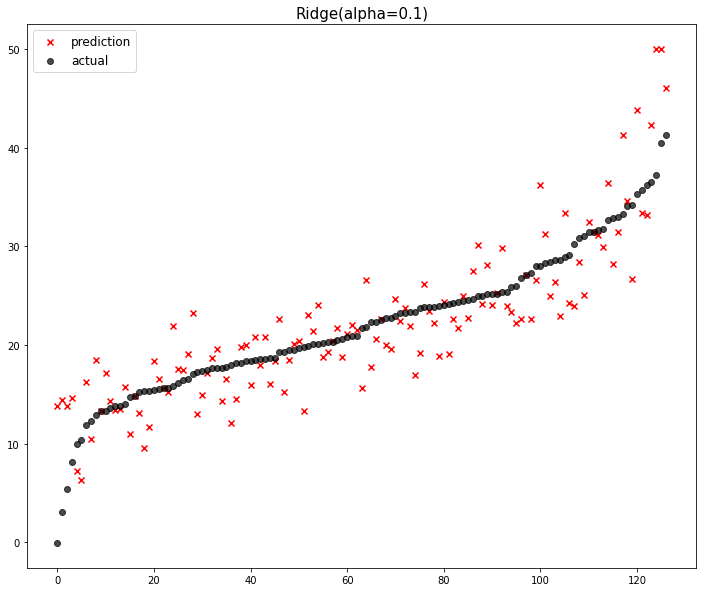

### Lasso

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>error</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>LinearRegression</td>
      <td>16.485165</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Ridge(alpha=0.1)</td>
      <td>16.479483</td>
    </tr>
  </tbody>
</table>
</div>

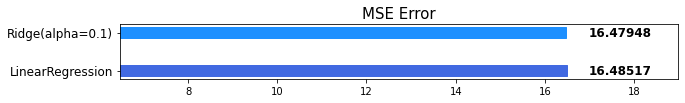

- 규제 계수인 `alpha=0.01`로 적용합니다.

In [ ]:
# 코드를 입력해 주세요
lasso = 
lasso.
pred = 
utils.plot_error('Lasso(alpha=0.01)', pred, y_test)

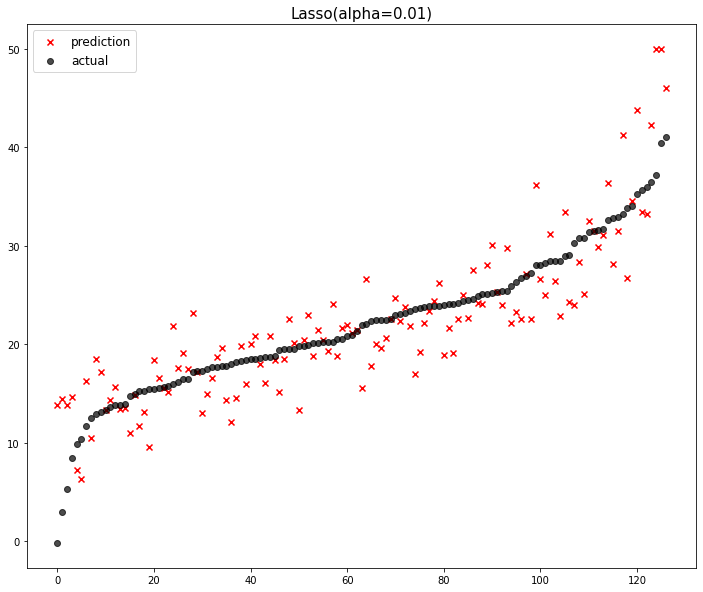

### ElasticNet

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>error</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>LinearRegression</td>
      <td>16.485165</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Ridge(alpha=0.1)</td>
      <td>16.479483</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Lasso(alpha=0.01)</td>
      <td>16.441822</td>
    </tr>
  </tbody>
</table>
</div>

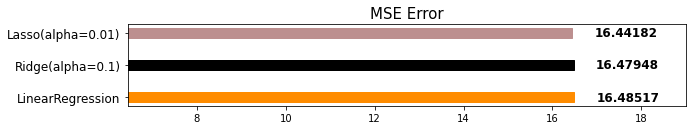

- 규제 계수인 `alpha=0.001`, `l1_ratio=0.8`을 적용합니다.

In [ ]:
# 코드를 입력해 주세요
elasticnet = 
elasticnet.
pred = 
utils.plot_error('ElasticNet(alpha=0.001, l1_ratio=0.8)', pred, y_test)    

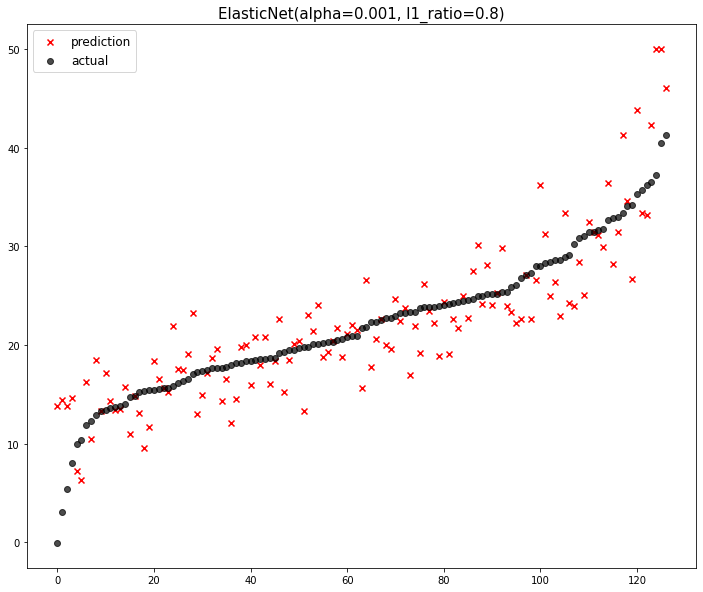

### Pipeline 학습

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>error</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>LinearRegression</td>
      <td>16.485165</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Ridge(alpha=0.1)</td>
      <td>16.479483</td>
    </tr>
    <tr>
      <th>2</th>
      <td>ElasticNet(alpha=0.001, l1_ratio=0.8)</td>
      <td>16.474783</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Lasso(alpha=0.01)</td>
      <td>16.441822</td>
    </tr>
  </tbody>
</table>
</div>

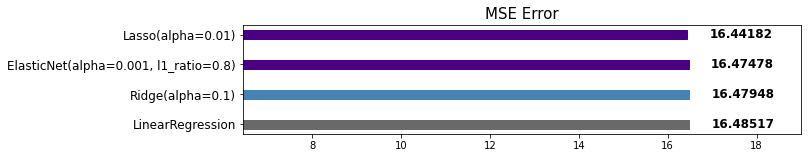

StandardScaler와 ElasticNet의 **파이프라인 학습** 합니다.

- ElasticNet 모델은 규제 계수인 `alpha=0.01`, `l1_ratio=0.8`을 적용합니다.

In [ ]:
elasticnet_pipeline = make_pipeline(
    # 코드를 입력해 주세요
    
    
)
# 코드를 입력해 주세요
elasticnet_pipeline.
elasticnet_pred = 
utils.plot_error('Standard ElasticNet', elasticnet_pred, y_test)

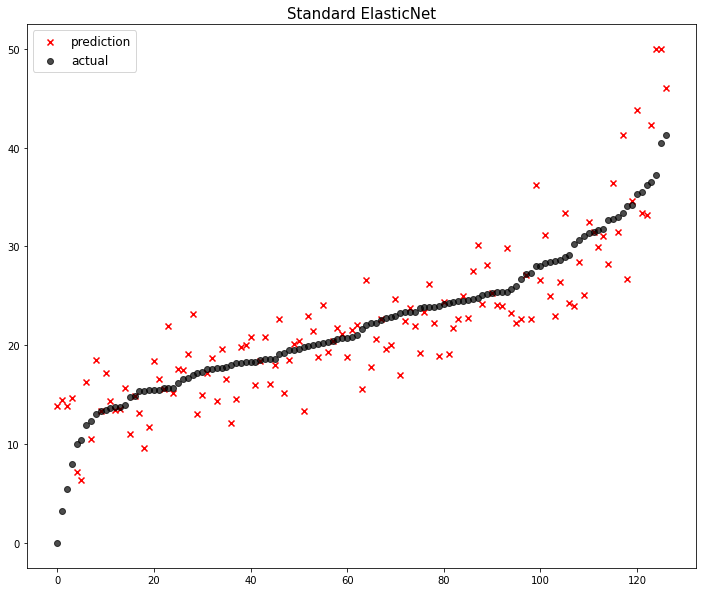

### PolynomialFeatures

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>error</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>LinearRegression</td>
      <td>16.485165</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Ridge(alpha=0.1)</td>
      <td>16.479483</td>
    </tr>
    <tr>
      <th>2</th>
      <td>ElasticNet(alpha=0.001, l1_ratio=0.8)</td>
      <td>16.474783</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Lasso(alpha=0.01)</td>
      <td>16.441822</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Standard ElasticNet</td>
      <td>16.423137</td>
    </tr>
  </tbody>
</table>
</div>

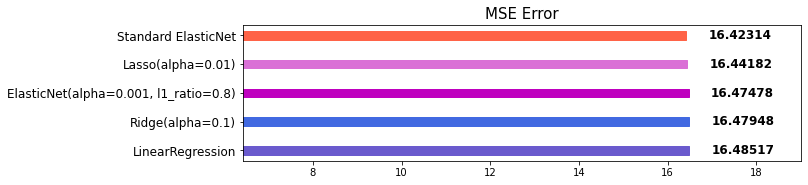

PolynomialFeatures와 ElasticNet의 파이프라인 학습을 진행합니다.

- PolynomialFeatures는 `degree=2`, `include_bias=False`로 적용합니다.
- ElasticNet 모델은 규제 계수인 `alpha=0.1`, `l1_ratio=0.8`을 적용합니다.

In [ ]:
poly_pipeline = make_pipeline(
    
    
)
poly_pipeline.
poly_pred = 
utils.plot_error('Poly ElasticNet', poly_pred, y_test)

# 앙상블 (Ensemble)

[scikit-learn 도큐먼트](https://scikit-learn.org/stable/modules/classes.html?highlight=ensemble#module-sklearn.ensemble)

## 보팅 (Voting) - 회귀 (Regression)

Voting은 단어 뜻 그대로 **투표를 통해 결정하는 방식**입니다. Voting은 Bagging과 투표방식이라는 점에서 유사하지만, 다음과 같은 큰 차이점이 있습니다.

- Voting은 다른 알고리즘 model을 조합해서 사용합니다.
- Bagging은 같은 알고리즘 내에서 다른 sample 조합을 사용합니다.


In [ ]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

반드시, **Tuple 형태로 모델**을 정의해야 합니다.

In [ ]:
single_models = [
    ('linear_reg', linear_reg), 
    ('ridge', ridge), 
    ('lasso', lasso), 
    ('elasticnet_pipeline', elasticnet_pipeline), 
    ('poly_pipeline', poly_pipeline)
]

In [ ]:
voting_regressor = VotingRegressor(single_models)

In [ ]:
voting_regressor.fit(x_train, y_train)

In [ ]:
voting_pred = voting_regressor.predict(x_test)

In [ ]:
utils.plot_error('Voting Ensemble', voting_pred, y_test)

## 보팅 (Voting) - 분류 (Classification)

[자세한 내용 보기](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-1)

분류기 모델을 만들때, Voting 앙상블은 1가지의 **중요한 parameter**가 있습니다.

`voting` = {'hard', 'soft'}

**hard**로 설정한 경우

class를 0, 1로 분류 예측을 하는 이진 분류를 예로 들어 보겠습니다.

Hard Voting 방식에서는 결과 값에 대한 다수 class를 차용합니다.

classification을 예로 들어 보자면, 분류를 예측한 값이 1, 0, 0, 1, 1 이었다고 가정한다면 1이 3표, 0이 2표를 받았기 때문에 Hard Voting 방식에서는 1이 최종 값으로 예측을 하게 됩니다.

**soft**

soft vote 방식은 각각의 확률의 평균 값을 계산한다음에 가장 확률이 높은 값으로 확정짓게 됩니다.

가령 class 0이 나올 확률이 (0.4, 0.9, 0.9, 0.4, 0.4)이었고, class 1이 나올 확률이 (0.6, 0.1, 0.1, 0.6, 0.6) 이었다면, 

- class 0이 나올 최종 확률은 (0.4+0.9+0.9+0.4+0.4) / 5 = 0.44, 
- class 1이 나올 최종 확률은 (0.6+0.1+0.1+0.6+0.6) / 5 = 0.4 

가 되기 때문에 앞선 Hard Vote의 결과와는 다른 결과 값이 최종 으로 선출되게 됩니다.

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [ ]:
models = [
    ('Logi', LogisticRegression()), 
    ('ridge', RidgeClassifier())
]

voting 옵션에 대하여 지정합니다.

In [ ]:
vc = VotingClassifier(models, voting='soft')

## 배깅(Bagging)

[자세한 내용 보기](https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-2)

Bagging은 **Bootstrap Aggregating의 줄임말**입니다.

- Bootstrap = Sample(샘플) + Aggregating = 합산

Bootstrap은 여러 개의 dataset을 중첩을 허용하게 하여 샘플링하여 분할하는 방식

데이터 셋의 구성이 [1, 2, 3, 4, 5 ]로 되어 있다면,

1. group 1 = [1, 2, 3]
2. group 2 = [1, 3, 4]
3. group 3 = [2, 3, 5]

In [ ]:
Image('https://teddylee777.github.io/images/2019-12-17/image-20191217015537872.png')

**Voting VS Bagging**

* **Voting**은 여러 알고리즘의 조합에 대한 앙상블
* **Bagging**은 하나의 단일 알고리즘에 대하여 여러 개의 샘플 조합으로 앙상블

**대표적인 Bagging 앙상블**
1. RandomForest
2. Bagging

## RandomForest

- DecisionTree(트리)기반 Bagging 앙상블
- 굉장히 인기있는 앙상블 모델
- 사용성이 쉽고, 성능도 우수함

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

`random_state=SEED`로 설정합니다.

In [ ]:
# 코드를 입력해 주세요
rfr = 
rfr.
rfr_pred = 
utils.plot_error('RandomForest Ensemble', rfr_pred, y_test)

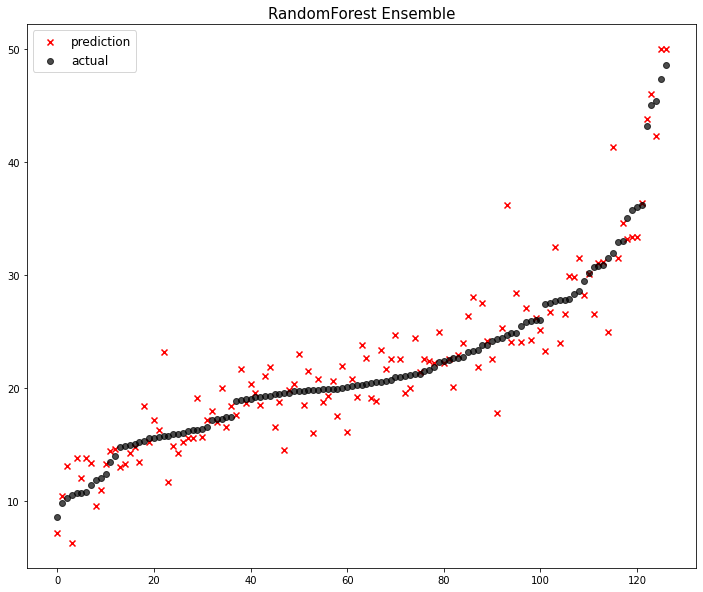

**주요 Hyperparameter**

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>error</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>LinearRegression</td>
      <td>16.485165</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Ridge(alpha=0.1)</td>
      <td>16.479483</td>
    </tr>
    <tr>
      <th>2</th>
      <td>ElasticNet(alpha=0.001, l1_ratio=0.8)</td>
      <td>16.474783</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Lasso(alpha=0.01)</td>
      <td>16.441822</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Standard ElasticNet</td>
      <td>16.423137</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Voting Ensemble</td>
      <td>13.163312</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Poly ElasticNet</td>
      <td>9.687051</td>
    </tr>
    <tr>
      <th>7</th>
      <td>RandomForest Ensemble</td>
      <td>6.969319</td>
    </tr>
  </tbody>
</table>
</div>

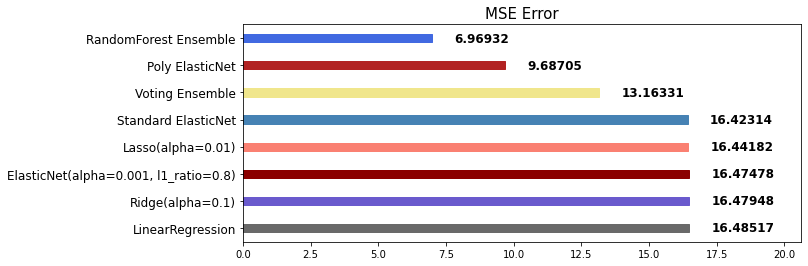

<p><strong>[출력 결과]</strong></p><pre><Figure size 864x720 with 1 Axes></pre>

<p><strong>[출력 결과]</strong></p><pre><Figure size 720x288 with 1 Axes></pre>

- `random_state`: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- `n_jobs`: CPU 사용 갯수
- `max_depth`: 깊어질 수 있는 최대 깊이. 과대적합 방지용
- `n_estimators`: 앙상블하는 트리의 갯수
- `max_features`: 최대로 사용할 feature의 갯수. 과대적합 방지용
- `min_samples_split`: 트리가 분할할 때 최소 샘플의 갯수. default=2. 과대적합 방지용

튜닝을 할 땐 반드시 `random_state` 값을 **고정**시킵니다!

In [ ]:
rfr = RandomForestRegressor(random_state=SEED, n_estimators=1500, max_depth=9, max_features=0.9)
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)
utils.plot_error('RandomForest Ensemble w/ Tuning', rfr_pred, y_test)

## 부스팅 (Boosting)

[자세한 내용 보기]('https://teddylee777.github.io/machine-learning/ensemble%EA%B8%B0%EB%B2%95%EC%97%90-%EB%8C%80%ED%95%9C-%EC%9D%B4%ED%95%B4%EC%99%80-%EC%A2%85%EB%A5%98-3')

Boosting 알고리즘 역시 앙상블 학습 (ensemble learning)이며, **약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 가중치를 부여해 오차를 보완**해 나가는 방식입니다.

다른 앙상블 기법과 가장 다른 점중 하나는 바로 순차적인 학습을 하며 weight를 부여해서 오차를 보완해 나간다는 점인데요. 순차적이기 때문에 병렬 처리에 어려움이 있고, 그렇기 때문에 **다른 앙상블 대비 학습 시간이 오래걸린다는 단점**이 있습니다.

약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 **가중치를 부여해 오차를 보완**해 나가는 방식입니다.

**장점** 
- 성능이 매우 우수하다 (Lgbm, XGBoost)

**단점**
- 부스팅 알고리즘의 특성상 계속 약점(오분류/잔차)을 보완하려고 하기 때문에 **잘못된 레이블링이나 아웃라이어에 필요 이상으로 민감**할 수 있다
- 다른 앙상블 대비 **학습 시간이 오래걸린다는 단점**이 존재

In [ ]:
Image('https://keras.io/img/graph-kaggle-1.jpeg', width=800)

**대표적인 Boosting 앙상블**
1. AdaBoost
2. GradientBoost
3. LightGBM (LGBM)
4. XGBoost

## GradientBoost

- 성능이 우수함
- 학습시간이 해도해도 너무 느리다

[사이킷런 공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html?highlight=gradient%20boost#sklearn.ensemble.GradientBoostingRegressor)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

`random_state=SEED`로 설정합니다.

In [ ]:
# 코드를 입력해 주세요
gbr = 
gbr.
gbr_pred = 
utils.plot_error('GradientBoost Ensemble', gbr_pred, y_test)

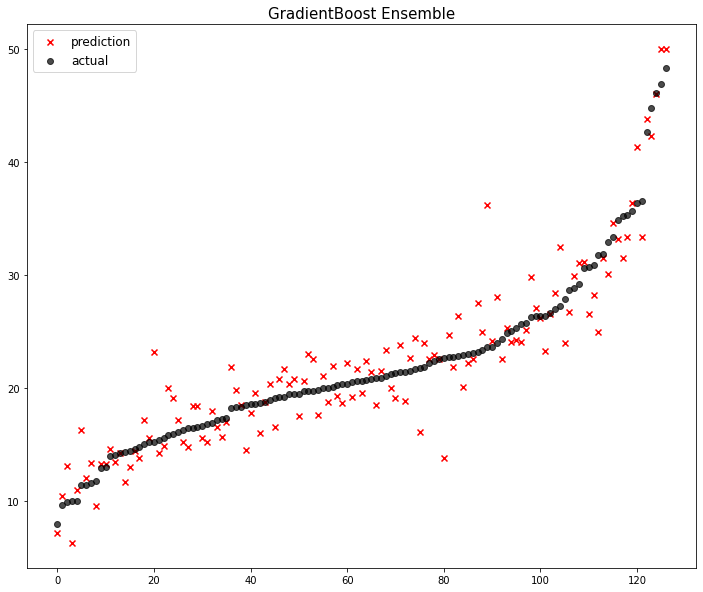

**주요 Hyperparameter**
- `random_state`: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- `n_jobs`: CPU 사용 갯수
- `learning_rate`: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- `n_estimators`: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- `subsample`: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용
- `min_samples_split`: 노드 분할시 최소 샘플의 갯수. default=2. 과대적합 방지용

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>error</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>LinearRegression</td>
      <td>16.485165</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Ridge(alpha=0.1)</td>
      <td>16.479483</td>
    </tr>
    <tr>
      <th>2</th>
      <td>ElasticNet(alpha=0.001, l1_ratio=0.8)</td>
      <td>16.474783</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Lasso(alpha=0.01)</td>
      <td>16.441822</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Standard ElasticNet</td>
      <td>16.423137</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Voting Ensemble</td>
      <td>13.163312</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Poly ElasticNet</td>
      <td>9.687051</td>
    </tr>
    <tr>
      <th>7</th>
      <td>GradientBoost Ensemble</td>
      <td>7.177708</td>
    </tr>
    <tr>
      <th>8</th>
      <td>RandomForest Ensemble</td>
      <td>6.969319</td>
    </tr>
    <tr>
      <th>9</th>
      <td>RandomForest Ensemble w/ Tuning</td>
      <td>6.851502</td>
    </tr>
  </tbody>
</table>
</div>

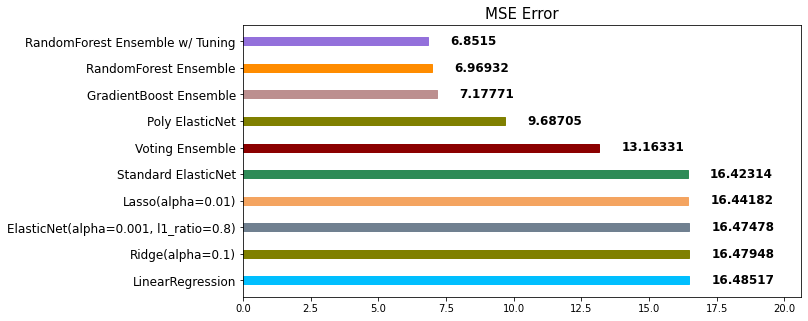

<p><strong>[출력 결과]</strong></p><pre><Figure size 864x720 with 1 Axes></pre>

<p><strong>[출력 결과]</strong></p><pre><Figure size 720x360 with 1 Axes></pre>

In [ ]:
gbr = GradientBoostingRegressor(random_state=SEED, learning_rate=0.01)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
utils.plot_error('GradientBoosting(lr=0.01)', gbr_pred, y_test)

In [ ]:
gbr = GradientBoostingRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1000)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
utils.plot_error('GradientBoosting(lr=0.01, est=1000)', gbr_pred, y_test)

In [ ]:
gbr = GradientBoostingRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1000, subsample=0.8)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
utils.plot_error('GradientBoosting(lr=0.01, est=1000, subsample=0.8)', gbr_pred, y_test)

## XGBoost
e**X**treme **G**radient **B**oosting

[공식 도큐먼트](https://xgboost.readthedocs.io/en/latest/)

**주요 특징**
- scikit-learn 패키지가 아닙니다.
- 성능이 우수함
- GBM보다는 빠르고 성능도 향상되었습니다.
- 여전히 학습시간이 매우 느리다

In [ ]:
from xgboost import XGBRegressor, XGBClassifier

In [ ]:
# 코드를 입력해 주세요
xgb = 
xgb.
xgb_pred = 
utils.plot_error('XGBoost', xgb_pred, y_test)

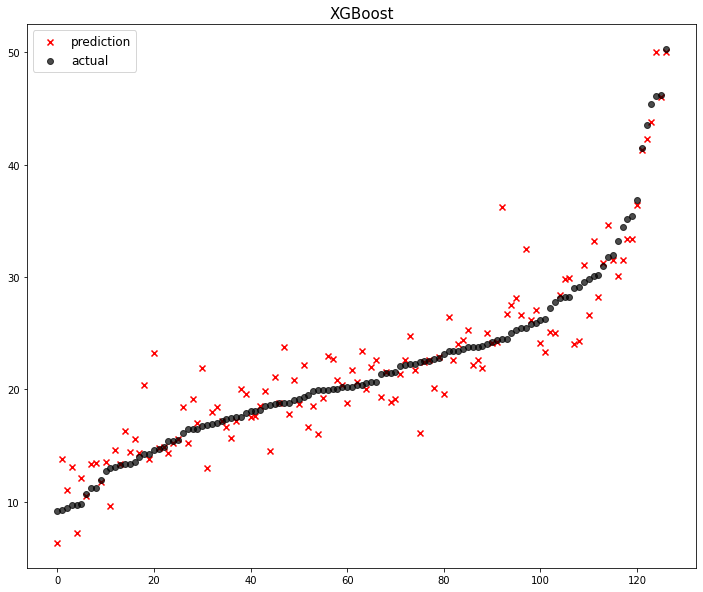

**주요 Hyperparameter**
- `random_state`: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- `n_jobs`: CPU 사용 갯수
- `learning_rate`: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- `n_estimators`: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- `max_depth`: 트리의 깊이. 과대적합 방지용. default=3. 
- `subsample`: 샘플 사용 비율. 과대적합 방지용. default=1.0
- `colsample_bytree`: 최대로 사용할 feature의 비율. 과대적합 방지용. default=1.0

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>error</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>GradientBoosting(lr=0.01)</td>
      <td>17.157073</td>
    </tr>
    <tr>
      <th>1</th>
      <td>LinearRegression</td>
      <td>16.485165</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Ridge(alpha=0.1)</td>
      <td>16.479483</td>
    </tr>
    <tr>
      <th>3</th>
      <td>ElasticNet(alpha=0.001, l1_ratio=0.8)</td>
      <td>16.474783</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Lasso(alpha=0.01)</td>
      <td>16.441822</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Standard ElasticNet</td>
      <td>16.423137</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Voting Ensemble</td>
      <td>13.163312</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Poly ElasticNet</td>
      <td>9.687051</td>
    </tr>
    <tr>
      <th>8</th>
      <td>GradientBoost Ensemble</td>
      <td>7.177708</td>
    </tr>
    <tr>
      <th>9</th>
      <td>RandomForest Ensemble</td>
      <td>6.969319</td>
    </tr>
    <tr>
      <th>10</th>
      <td>GradientBoosting(lr=0.01, est=1000)</td>
      <td>6.891282</td>
    </tr>
    <tr>
      <th>11</th>
      <td>XGBoost</td>
      <td>6.878353</td>
    </tr>
    <tr>
      <th>12</th>
      <td>RandomForest Ensemble w/ Tuning</td>
      <td>6.851502</td>
    </tr>
    <tr>
      <th>13</th>
      <td>GradientBoosting(lr=0.01, est=1000, subsample=...</td>
      <td>6.455191</td>
    </tr>
  </tbody>
</table>
</div>

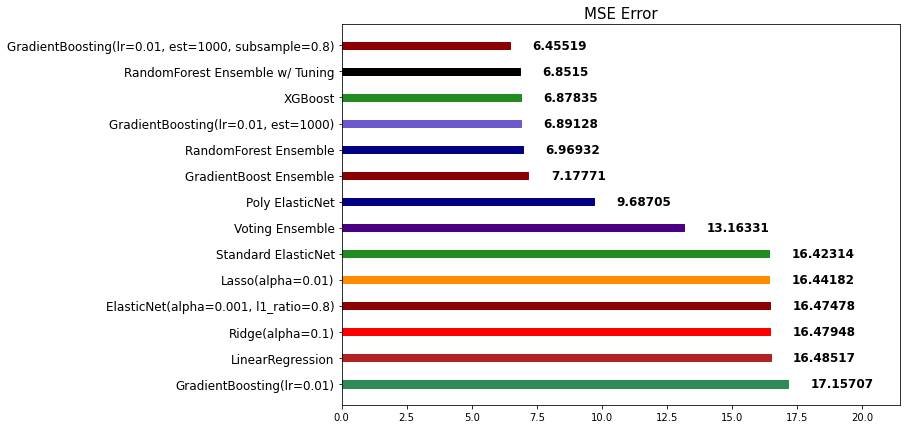

<p><strong>[출력 결과]</strong></p><pre><Figure size 864x720 with 1 Axes></pre>

<p><strong>[출력 결과]</strong></p><pre><Figure size 720x504 with 1 Axes></pre>

In [ ]:
xgb = XGBRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1000, subsample=0.8, colsample_bytree=0.8, max_depth=7)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
utils.plot_error('XGBoost w/ Tuning', xgb_pred, y_test)

### LightGBM

[공식 도큐먼트](https://lightgbm.readthedocs.io/en/latest/)

**주요 특징**
- scikit-learn 패키지가 아닙니다 (Microsoft 사 개발)
- 부스팅 계열의 알고리즘 입니다.
- 성능이 우수함

**특이점**
- 기존 부스팅 계열 알고리즘이 가지는 단점인 **느린 학습 속도를 개선**하였습니다.

In [ ]:
from lightgbm import LGBMRegressor, LGBMClassifier

In [ ]:
# 코드를 입력해 주세요
lgbm = 
lgbm.
lgbm_pred = 
utils.plot_error('LGBM', lgbm_pred, y_test)

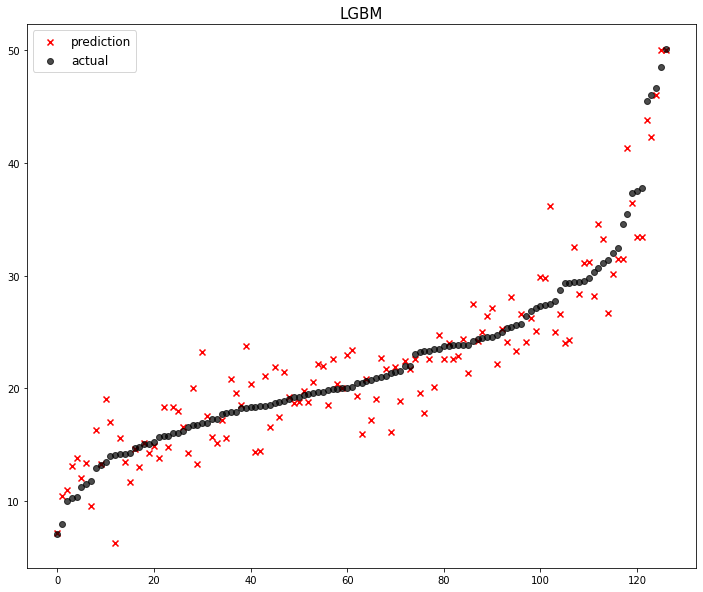

**주요 Hyperparameter**
- `random_state`: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- `n_jobs`: CPU 사용 갯수
- `learning_rate`: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- `n_estimators`: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- `max_depth`: 트리의 깊이. 과대적합 방지용. default=3. 
- `colsample_bytree`: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>model</th>
      <th>error</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>GradientBoosting(lr=0.01)</td>
      <td>17.157073</td>
    </tr>
    <tr>
      <th>1</th>
      <td>LinearRegression</td>
      <td>16.485165</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Ridge(alpha=0.1)</td>
      <td>16.479483</td>
    </tr>
    <tr>
      <th>3</th>
      <td>ElasticNet(alpha=0.001, l1_ratio=0.8)</td>
      <td>16.474783</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Lasso(alpha=0.01)</td>
      <td>16.441822</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Standard ElasticNet</td>
      <td>16.423137</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Voting Ensemble</td>
      <td>13.163312</td>
    </tr>
    <tr>
      <th>7</th>
      <td>Poly ElasticNet</td>
      <td>9.687051</td>
    </tr>
    <tr>
      <th>8</th>
      <td>LGBM</td>
      <td>7.300779</td>
    </tr>
    <tr>
      <th>9</th>
      <td>GradientBoost Ensemble</td>
      <td>7.177708</td>
    </tr>
    <tr>
      <th>10</th>
      <td>RandomForest Ensemble</td>
      <td>6.969319</td>
    </tr>
    <tr>
      <th>11</th>
      <td>GradientBoosting(lr=0.01, est=1000)</td>
      <td>6.891282</td>
    </tr>
    <tr>
      <th>12</th>
      <td>XGBoost</td>
      <td>6.878353</td>
    </tr>
    <tr>
      <th>13</th>
      <td>RandomForest Ensemble w/ Tuning</td>
      <td>6.851502</td>
    </tr>
    <tr>
      <th>14</th>
      <td>GradientBoosting(lr=0.01, est=1000, subsample=...</td>
      <td>6.455191</td>
    </tr>
    <tr>
      <th>15</th>
      <td>XGBoost w/ Tuning</td>
      <td>5.339177</td>
    </tr>
  </tbody>
</table>
</div>

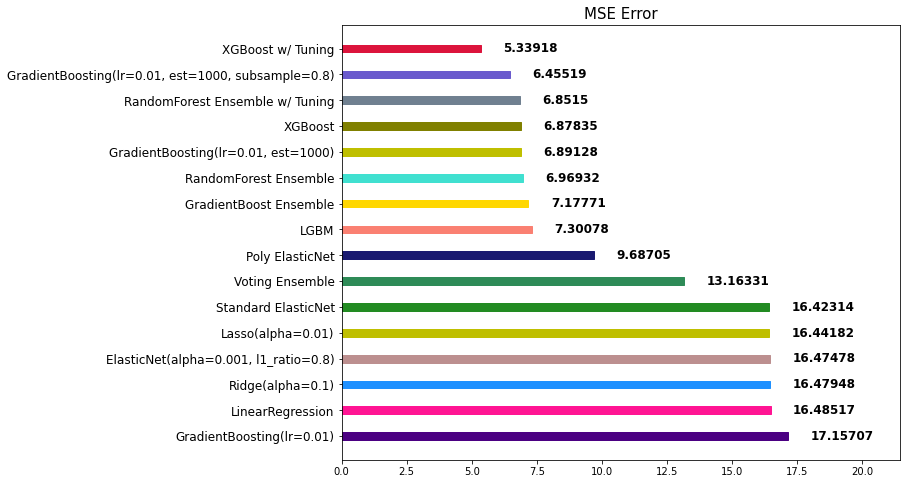

<p><strong>[출력 결과]</strong></p><pre><Figure size 864x720 with 1 Axes></pre>

<p><strong>[출력 결과]</strong></p><pre><Figure size 720x576 with 1 Axes></pre>

In [ ]:
lgbm = LGBMRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1000, colsample_bytree=0.9, n_jobs=-1)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
utils.plot_error('LGBM w/ Tuning', lgbm_pred, y_test)

### Stacking

개별 모델이 예측한 데이터를 기반으로 **final_estimator** 종합하여 예측을 수행합니다.

- 성능을 극으로 끌어올릴 때 활용하기도 합니다.
- 과대적합을 유발할 수 있습니다. (특히, 데이터셋이 적은 경우)

[공식문서](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html)

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
stack_models = [
    ('elasticnet', poly_pipeline), 
    ('randomforest', rfr), 
    ('gbr', gbr),
    ('lgbm', lgbm),
]

In [ ]:
stack_reg = StackingRegressor(stack_models, final_estimator=xgb, n_jobs=-1)

In [ ]:
stack_reg.fit(x_train, y_train)
stack_pred = stack_reg.predict(x_test)
utils.plot_error('Stacking Ensemble', stack_pred, y_test)

### Weighted Blending

각 모델의 예측값에 대하여 weight를 곱하여 최종 output 계산
- 모델에 대한 가중치를 조절하여, 최종 output을 산출합니다.
- **가중치의 합은 1.0**이 되도록 합니다.

In [ ]:
final_outputs = {
    'elasticnet': poly_pred, 
    'randomforest': rfr_pred, 
    'gbr': gbr_pred,
    'xgb': xgb_pred, 
    'lgbm': lgbm_pred,
    'stacking': stack_pred,
}

In [ ]:
final_prediction=\
final_outputs['elasticnet'] * 0.1\
+final_outputs['randomforest'] * 0.15\
+final_outputs['gbr'] * 0.25\
+final_outputs['xgb'] * 0.35\
+final_outputs['lgbm'] * 0.15\

In [ ]:
utils.plot_error('Weighted Blending', final_prediction, y_test)

## 앙상블 모델을 정리하며

1. 앙상블은 대체적으로 단일 모델 대비 성능이 좋습니다.
2. 앙상블을 앙상블하는 기법인 Stacking과 Weighted Blending도 참고해 볼만 합니다.
3. 앙상블 모델은 적절한 **Hyperparameter 튜닝**이 중요합니다.
4. 앙상블 모델은 대체적으로 학습시간이 더 오래 걸립니다.
5. 따라서, 모델 튜닝을 하는 데에 걸리는 시간이 오래 소요됩니다.

# 검증 (Validation)과 튜닝 (Tuning)

## Cross Validation

- Cross Validation이란 모델을 평가하는 하나의 방법입니다.
- K-겹 교차검증(K-fold Cross Validation)을 많이 활용합니다.

**K-겹 교차검증**
- K-겹 교차 검증은 모든 데이터가 최소 한 번은 테스트셋으로 쓰이도록 합니다. 아래의 그림을 보면, 데이터를 5개로 쪼개 매번 테스트셋을 바꿔나가는 것을 볼 수 있습니다.

[예시]
- Estimation 1일때,

학습데이터: [B, C, D, E] / 검증데이터: [A]

- Estimation 2일때,

학습데이터: [A, C, D, E] / 검증데이터: [B]

In [ ]:
Image('https://static.packt-cdn.com/products/9781789617740/graphics/b04c27c5-7e3f-428a-9aa6-bb3ebcd3584c.png', width=800)

### K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [ ]:
n_splits = 5
kfold = KFold(n_splits=n_splits, random_state=9876, shuffle=True)

In [ ]:
df.head()

In [ ]:
X = np.array(df.drop('target', 1))
Y = np.array(df['target'])

In [ ]:
lgbm_fold = LGBMRegressor(random_state=SEED, n_jobs=-1)

In [ ]:
i = 1
total_error = 0
for train_index, test_index in kfold.split(X):
    x_train_fold, x_valid_fold = X[train_index], X[test_index]
    y_train_fold, y_valid_fold = Y[train_index], Y[test_index]
    
    lgbm_pred_fold = lgbm_fold.fit(x_train_fold, y_train_fold).predict(x_valid_fold)
    error = mean_squared_error(lgbm_pred_fold, y_valid_fold)
    print('Fold = {}, prediction score = {:.2f}'.format(i, error))
    total_error += error
    i+=1
print('---'*10)
print('Average Error: %s' % (total_error / n_splits))

## Hyperparameter 튜닝

- hypterparameter 튜닝시 경우의 수가 너무 많습니다.
- 따라서, 우리는 자동화할 필요가 있습니다.

sklearn 패키지에서 자주 사용되는 hyperparameter 튜닝을 돕는 클래스는 다음 2가지가 있습니다.

1. **RandomizedSearchCV**
2. **GridSearchCV**

**적용하는 방법**

1. 사용할 Search 방법을 선택합니다.
2. hyperparameter 도메인을 설정합니다. (`max_depth`, `n_estimators`..등등)
3. 학습을 시킨 후, 기다립니다.
4. 도출된 결과 값을 모델에 적용하고 성능을 비교합니다.

## RandomizedSearchCV

- 모든 매개 변수 값이 시도되는 것이 아니라 지정된 분포에서 고정 된 수의 매개 변수 설정이 샘플링됩니다. 
- 시도 된 매개 변수 설정의 수는 `n_iter`에 의해 제공됩니다.

**주요 Hyperparameter (LGBM)**
- `random_state`: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- `n_jobs`: CPU 사용 갯수
- `learning_rate`: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- `n_estimators`: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- `max_depth`: 트리의 깊이. 과대적합 방지용. default=3. 
- `colsample_bytree`: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

In [ ]:
params = {
    'n_estimators': [200, 500, 1000], 
    'learning_rate': [0.1, 0.05, 0.025], 
    'max_depth': [6, 7, 8], 
    'colsample_bytree': [0.8, 0.9, 1.0], 
    'subsample': [0.8, 0.9, 1.0],
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

`n_iter` 값을 조절하여, 총 몇 회의 시도를 진행할 것인지 정의합니다.

(회수가 늘어나면, 더 좋은 parameter를 찾을 확률은 올라가지만, 그만큼 시간이 오래걸립니다.)

In [ ]:
clf = RandomizedSearchCV(LGBMRegressor(), params, random_state=SEED, cv=3, n_iter=25, n_jobs=-1, scoring='neg_mean_squared_error')

In [ ]:
clf.fit(x_train, y_train)

In [ ]:
abs(clf.best_score_)

In [ ]:
clf.best_params_

In [ ]:
LGBMRegressor(**clf.best_params_)

In [ ]:
lgbm_best = LGBMRegressor(**clf.best_params_)
lgbm_best.fit(x_train, y_train)
lgbm_best_pred = lgbm_best.predict(x_test)
utils.plot_error('RandomSearch LGBM', lgbm_best_pred, y_test)

## GridSearchCV

- 모든 매개 변수 값에 대하여 **완전 탐색**을 시도합니다.
- 따라서, 최적화할 parameter가 많다면, **시간이 매우 오래**걸립니다.

In [ ]:
params = {
    'n_estimators': [500, 1000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'num_leaves': [9, 12, 15], 
    'colsample_bytree': [0.8, 0.9], 
    'subsample': [0.8, 0.9,],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(LGBMRegressor(), params, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
abs(grid_search.best_score_)

In [ ]:
grid_search.best_params_

In [ ]:
lgbm_best = LGBMRegressor(**grid_search.best_params_)
lgbm_best.fit(x_train, y_train)
lgbm_best_pred = lgbm_best.predict(x_test)
utils.plot_error('GridSearch LGBM', lgbm_best_pred, y_test)